In [1]:
!pip install librosa

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import torch


In [3]:
data_female=pd.read_csv('C:/Wireless Localization using Quantum Computing Yash & Sparsh/Datasets/Moroccan Dialect Emotion Recognition Dataset/Moroccan Dialect Emotion Recognition Dataset/female_features.csv')

In [5]:
data_female['label'].value_counts()

label
f_angry      200
f_fearful    200
f_happy      200
f_neutral    200
f_sad        200
Name: count, dtype: int64

In [7]:
X = data_female.iloc[:, :-1].values
y = data_female.iloc[:, -1].values

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check number of classes
num_classes = len(np.unique(y))
print(f"Number of classes: {num_classes}")

# Create a PyTorch Dataset
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Number of classes: 5


In [9]:
class_mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))
print("Class mapping:")
for class_name, class_number in class_mapping.items():
    print(f"Class '{class_name}' is assigned number {class_number}")

Class mapping:
Class 'f_angry' is assigned number 0
Class 'f_fearful' is assigned number 1
Class 'f_happy' is assigned number 2
Class 'f_neutral' is assigned number 3
Class 'f_sad' is assigned number 4


In [11]:
from sklearn.svm import SVC

In [13]:
mask = (y == 0) | (y == 1) | (y ==2)
X_filtered = X[mask]
y_filtered = y[mask]

In [15]:
np.unique(y_filtered)

array([0, 1, 2])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_dataset = EmotionDataset(X_train, y_train)
test_dataset = EmotionDataset(X_test, y_test)

In [282]:
svm_model=SVC()

In [283]:
svm_model.fit(X_train,y_train)

SVC()

In [273]:
y_pred = svm_model.predict(X_test)

In [274]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        40
           1       0.95      0.90      0.92        40
           2       0.81      0.97      0.89        40

    accuracy                           0.90       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.90      0.90       120



In [19]:
import numpy as np
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=5)

# Fit PCA on the training data and transform both training and testing data
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


In [ ]:
svm_classifier = SVC()

# Fit SVM on the reduced training data
svm_classifier.fit(X_train_reduced, y_train)

# Predict on the reduced testing data
y_pred = svm_classifier.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.725


In [29]:
!pip install qiskit

In [31]:
!pip install qiskit qiskit-machine-learning

In [23]:
from qiskit import *
from qiskit_machine_learning.algorithms import QSVC, NeuralNetworkClassifier

In [ ]:
qsvm=QSVC()

In [3]:
qsvm.fit(X_train_reduced, y_train)

# Predict on the reduced testing data
y_pred = qsvm.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.94      0.78      0.85        40
           2       0.91      0.97      0.94        40

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



In [25]:
import os
import pandas as pd
import numpy as np
import librosa
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [27]:
# Create a PyTorch Dataset
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [29]:
X = data_female.iloc[:, :-1].values
y = data_female.iloc[:, -1].values

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check number of classes
num_classes = len(np.unique(y))
print(f"Number of classes: {num_classes}")

Number of classes: 5


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_dataset = EmotionDataset(X_train, y_train)
test_dataset = EmotionDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [63]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(40, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.6)  # Dropout with 50% probability
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.6)  # Dropout with 50% probability
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.6)
        self.fc4=nn.Linear(128, 20)
        self.bn4 = nn.BatchNorm1d(20)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.6)
        self.fc5=nn.Linear(20, num_classes)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)

        return x

In [43]:
!pip install torchsummary

In [33]:
from torchsummary import summary

In [39]:
model=SimpleNN()

In [40]:
summary(model,(40,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          20,992
       BatchNorm1d-2                  [-1, 512]           1,024
              ReLU-3                  [-1, 512]               0
           Dropout-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
       BatchNorm1d-6                  [-1, 256]             512
              ReLU-7                  [-1, 256]               0
           Dropout-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
      BatchNorm1d-10                  [-1, 128]             256
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 64]           8,256
      BatchNorm1d-14                   

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adding weight decay

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)


In [42]:
num_epochs = 250
train_losses = []
test_losses = []
test_accuracies = []
train_accuracies=[]

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total=0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
                # Calculate training accuracy
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss / len(train_loader))
    train_accuracy = correct / total
    train_accuracies.append(train_accuracy)
    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    test_losses.append(test_loss / len(test_loader))
    test_accuracy = accuracy_score(all_labels, all_preds)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Train accuracy: {train_accuracy},Test Accuracy: {test_accuracy}')

    # Step the scheduler
    scheduler.step()

Epoch 1/250, Train Loss: 1.7314563941955567, Test Loss: 1.573279517037528, Test Accuracy: 0.325
Epoch 2/250, Train Loss: 1.6531525373458862, Test Loss: 1.5223735060010637, Test Accuracy: 0.39
Epoch 3/250, Train Loss: 1.59587562084198, Test Loss: 1.4765094859259469, Test Accuracy: 0.465
Epoch 4/250, Train Loss: 1.536154909133911, Test Loss: 1.4481463602610998, Test Accuracy: 0.435
Epoch 5/250, Train Loss: 1.5072139358520509, Test Loss: 1.4044865029198783, Test Accuracy: 0.44
Epoch 6/250, Train Loss: 1.4460645580291749, Test Loss: 1.3735827037266322, Test Accuracy: 0.42
Epoch 7/250, Train Loss: 1.418622670173645, Test Loss: 1.3312807594026839, Test Accuracy: 0.435
Epoch 8/250, Train Loss: 1.3448536539077758, Test Loss: 1.2935457910810197, Test Accuracy: 0.465
Epoch 9/250, Train Loss: 1.3152327060699462, Test Loss: 1.2621563162122453, Test Accuracy: 0.51
Epoch 10/250, Train Loss: 1.3070535135269166, Test Loss: 1.2424543755395072, Test Accuracy: 0.505
Epoch 11/250, Train Loss: 1.2439412474

In [ ]:
# Plotting training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plotting validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.plot(train_accuracies,label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('/content/drive/MyDrive/SA_new_results/acc1.png',dpi=600)

plt.show()

In [43]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.9 MB/s eta 0:00:00


In [2]:
!pip install pennylane-lightning[gpu]

In [35]:
import pennylane as qml

In [37]:
wires = 5
# dev = qml.device("lightning.qubit", wires=5)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [39]:
def H_layer(nqubits):
    """Layer of single-qubit Hadamard gates.
    """
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)


def RY_layer(w):
    """Layer of parametrized qubit rotations around the y axis.
    """
    for idx, element in enumerate(w):
        qml.RY(element, wires=idx)
def RX_layer(w):
    """Layer of parametrized qubit rotations around the y axis.
    """
    for idx, element in enumerate(w):
        qml.RX(element, wires=idx)
def RZ_layer(w):
    """Layer of parametrized qubit rotations around the y axis.
    """
    for idx, element in enumerate(w):
        qml.RZ(element, wires=idx)



def entangling_layer(nqubits):
    """Layer of CNOTs followed by another shifted layer of CNOT.
    """
    # In other words it should apply something like :
    # CNOT  CNOT  CNOT  CNOT...  CNOT
    #   CNOT  CNOT  CNOT...  CNOT
    for i in range(0, nqubits - 1, 2):  # Loop over even indices: i=0,2,...N-2
        qml.CNOT(wires=[i, i + 1])
    for i in range(1, nqubits - 1, 2):  # Loop over odd indices:  i=1,3,...N-3
        qml.CNOT(wires=[i, i + 1])


In [41]:
dev = qml.device('default.qubit', wires=5)
device = "cpu"
@qml.qnode(dev, interface="torch")
def quantum_net(q_input_features, q_weights_flat, q_depth=4, n_qubits=5):
    """
    The variational quantum circuit.
    """

    # Reshape weights
    q_weights = q_weights_flat.reshape(q_depth,2,n_qubits)

    # Start from state |+> , unbiased w.r.t. |0> and |1>
    H_layer(n_qubits)

    # Embed features in the quantum node
    RY_layer(q_input_features)

    # Sequence of trainable variational layers
    for k in range(q_depth):
        #RZ_layer(q_weights[k][0])
        RY_layer(q_weights[k][0])
        RZ_layer(q_weights[k][1])
        # RX_layer(q_weights[k][1])
        entangling_layer(n_qubits)


    # Expectation values in the Z basis
    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(n_qubits)]
    return tuple(exp_vals)

In [43]:
q_features=torch.randn(5)

In [45]:
q_params = nn.Parameter(torch.randn(5*2*3))

In [47]:
print(qml.draw(quantum_net)(q_features, q_params,3,5))

0: ──H──RY(-0.95)──RY(-0.27)──RZ(-2.39)─╭●──RY(-0.26)──RZ(0.89)─────────────╭●──RY(-0.14)──RZ(0.89)
1: ──H──RY(-1.21)──RY(1.47)───RZ(1.90)──╰X─╭●──────────RY(1.39)───RZ(-1.98)─╰X─╭●──────────RY(2.20)
2: ──H──RY(-0.60)──RY(1.90)───RZ(1.19)──╭●─╰X──────────RY(-0.13)──RZ(-0.46)─╭●─╰X──────────RY(0.88)
3: ──H──RY(-0.61)──RY(0.69)───RZ(-0.42)─╰X─╭●──────────RY(0.45)───RZ(1.26)──╰X─╭●──────────RY(1.89)
4: ──H──RY(0.88)───RY(1.21)───RZ(-0.17)────╰X──────────RY(-3.47)──RZ(0.13)─────╰X──────────RY(0.11)

─────────────╭●────┤  <Z>
───RZ(-0.34)─╰X─╭●─┤  <Z>
───RZ(-2.61)─╭●─╰X─┤  <Z>
───RZ(-1.54)─╰X─╭●─┤  <Z>
───RZ(-0.02)────╰X─┤  <Z>


In [50]:
class QuantumLayer(nn.Module):
    """ Quantum mapping layer """
    def __init__(self,q_depth=4, n_qubits=5, q_delta=0.01):
        super().__init__()
        self.q_depth = q_depth
        self.n_qubits = n_qubits
        self.q_params = nn.Parameter(q_delta * torch.randn(q_depth *2*n_qubits))


    def forward(self, x):
        q_in = torch.tanh(x) * np.pi / 2.0
        q_out = torch.Tensor(0, self.n_qubits)
        q_out = q_out.to(device)



        for elem in q_in:
            q_out_elem = torch.hstack(quantum_net(elem, self.q_params, self.q_depth, self.n_qubits)).float().unsqueeze(0)
            q_out = torch.cat((q_out, q_out_elem))
            #print(q_out)

        return q_out


In [52]:
model=QuantumLayer(q_depth=4,n_qubits=5)

In [54]:
tensor_random = torch.rand(1, 5)

In [56]:
model(tensor_random )

tensor([[-0.8628, -0.6084, -0.6856, -0.8519,  0.5592]], grad_fn=<CatBackward0>)

In [58]:
class Hybrid_Quantum_Model(nn.Module):
    def __init__(self, num_target_classes=5,q_depth=4, n_qubits=5, q_delta=0.01, n_qlayers = 2):
        super().__init__()
        ## sanity check for n_qubits: must be the same as global variable wires
        if n_qubits != wires:
            print('[WARNING]: Number of qubits: {} must be the same number of wires: {}'.format(n_qubits, wires))
            raise Exception("Please set a corret number of wires in .py file or change the number of qubits")
        self.last_layer=n_qubits*n_qlayers
        self.num_target_classes = num_target_classes
        self.n_qlayers = n_qlayers
        self.fc1 = nn.Linear(40, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.6)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.6)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.6)
        self.fc4=nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.6)
        self.fc5=nn.Linear(64, n_qubits * self.n_qlayers)
        self.q_classifier = nn.Linear(n_qubits * n_qlayers, self.num_target_classes)
        q_layers_list = [QuantumLayer(q_depth=q_depth, n_qubits=n_qubits)for _ in range(n_qlayers)]
        self.q_layers = torch.nn.Sequential(*q_layers_list)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        features_split = torch.split(x, self.last_layer // self.n_qlayers, dim=1)
        q_features = [q_layer(feature) for q_layer, feature in zip(self.q_layers, features_split)]
        q_features = torch.cat(q_features, axis=1)
        y =  self.q_classifier(q_features)
        return y


In [60]:
model=Hybrid_Quantum_Model()

In [62]:
summary(model, input_size=(40,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          20,992
       BatchNorm1d-2                  [-1, 512]           1,024
              ReLU-3                  [-1, 512]               0
           Dropout-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
       BatchNorm1d-6                  [-1, 256]             512
              ReLU-7                  [-1, 256]               0
           Dropout-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
      BatchNorm1d-10                  [-1, 128]             256
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 64]           8,256
      BatchNorm1d-14                   

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adding weight decay

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)


In [68]:
num_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []
train_accuracies=[]

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total=0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss / len(train_loader))
    train_accuracy = correct / total
    train_accuracies.append(train_accuracy)


    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    test_losses.append(test_loss / len(test_loader))
    test_accuracy = accuracy_score(all_labels, all_preds)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]},Train accuracy: {train_accuracy},Test Accuracy: {test_accuracy}')

    # Step the scheduler
    scheduler.step()

Epoch 1/200, Train Loss: 1.653930196762085, Test Loss: 1.594690544264657,Train accuracy: 0.19375,Test Accuracy: 0.285
Epoch 2/200, Train Loss: 1.61484375, Test Loss: 1.5569335392543249,Train accuracy: 0.225,Test Accuracy: 0.355
Epoch 3/200, Train Loss: 1.589563946723938, Test Loss: 1.533033779689244,Train accuracy: 0.26875,Test Accuracy: 0.35
Epoch 4/200, Train Loss: 1.5740180969238282, Test Loss: 1.5064080272402083,Train accuracy: 0.2775,Test Accuracy: 0.375
Epoch 5/200, Train Loss: 1.5464076280593873, Test Loss: 1.4687202317374093,Train accuracy: 0.295,Test Accuracy: 0.39
Epoch 6/200, Train Loss: 1.5033261489868164, Test Loss: 1.440066201346261,Train accuracy: 0.35875,Test Accuracy: 0.42
Epoch 7/200, Train Loss: 1.4630683660507202, Test Loss: 1.413258331162589,Train accuracy: 0.38125,Test Accuracy: 0.42
Epoch 8/200, Train Loss: 1.4546912145614623, Test Loss: 1.3702244418007987,Train accuracy: 0.38375,Test Accuracy: 0.435
Epoch 9/200, Train Loss: 1.3978986978530883, Test Loss: 1.35411

In [74]:
# Save the model
model_save_path = 'C:/Wireless Localization using Quantum Computing Yash & Sparsh/HQNN_emotion.pth'
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to C:/Wireless Localization using Quantum Computing Yash & Sparsh/HQNN_emotion.pth


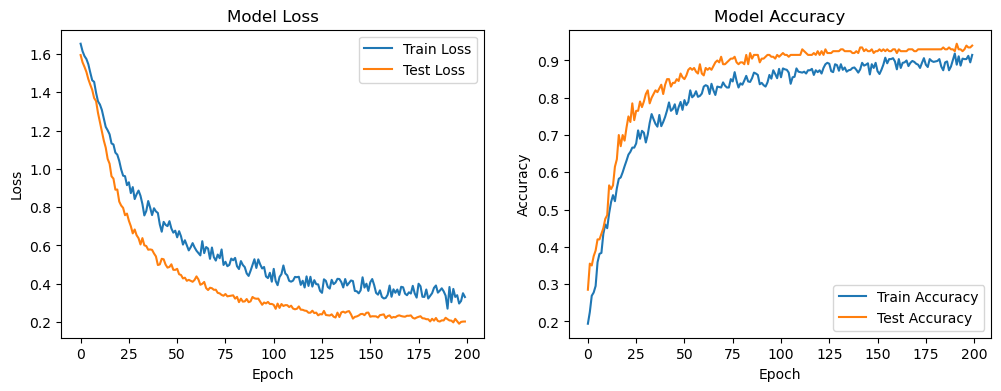

In [72]:
# Plotting training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plotting validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(train_accuracies,label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('C:/Wireless Localization using Quantum Computing Yash & Sparsh/er_qd4_Ry_Rz.png',dpi=600)

plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pennylane as qml
# from qiskit import Aer
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider import least_busy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# 1. Load IBM Quantum account using IBMProvider
provider = IBMProvider('')  # This assumes your IBM Quantum account is set up and you are logged in

# 2. Find the least busy quantum backend
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational))
print("Using backend:", backend)

# 3. Define the quantum device using the selected backend
dev = qml.device('qiskit.remote', wires=5, backend=backend)

# 4. Define the quantum node (qnode) with the IBMQ device for testing
@qml.qnode(dev, interface="torch")
def quantum_net_ibm(q_input_features, q_weights_flat, q_depth=4, n_qubits=5):
    """
    Variational quantum circuit using IBMQ backend.
    """
    q_weights = q_weights_flat.reshape(q_depth, 2, n_qubits)

    H_layer(n_qubits)  # Start from state |+>
    RY_layer(q_input_features)  # Feature embedding

    for k in range(q_depth):
        RY_layer(q_weights[k][0])
        RZ_layer(q_weights[k][1])
        entangling_layer(n_qubits)

    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(n_qubits)]
    return tuple(exp_vals)

# 5. Update the forward method in QuantumLayer for testing on IBMQ
class QuantumLayer(nn.Module):
    def __init__(self, q_depth=4, n_qubits=5, q_delta=0.01, testing=False):
        super().__init__()
        self.q_depth = q_depth
        self.n_qubits = n_qubits
        self.testing = testing
        self.q_params = nn.Parameter(q_delta * torch.randn(q_depth * 2 * n_qubits))

    def forward(self, x):
        q_in = torch.tanh(x) * np.pi / 2.0
        q_out = torch.Tensor(0, self.n_qubits).to(device)

        for elem in q_in:
            if self.testing:
                q_out_elem = torch.hstack(quantum_net_ibm(elem, self.q_params, self.q_depth, self.n_qubits)).float().unsqueeze(0)
            else:
                q_out_elem = torch.hstack(quantum_net(elem, self.q_params, self.q_depth, self.n_qubits)).float().unsqueeze(0)
            q_out = torch.cat((q_out, q_out_elem))

        return q_out

# Load the saved model for testing
model_path = 'C:/Wireless Localization using Quantum Computing Yash & Sparsh/HQNN_emotion.pth'
model = Hybrid_Quantum_Model()
model.load_state_dict(torch.load(model_path))
model.eval()

# Set the model to testing mode for using IBMQ
for layer in model.q_layers:
    layer.testing = True

# Prepare the test data (assuming test_loader is available)
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy on IBM hardware
test_accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy using IBM hardware: {test_accuracy}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Neutral', 'Happy', 'Sad', 'Angry', 'Fearful'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Quantum Model on IBM Hardware')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
